In [15]:
import pandas as pd #Manipulación y análisis de datos
from sklearn.tree import DecisionTreeClassifier #Árboles de desición
from sklearn.model_selection import train_test_split #Permite dividir arreglos de datos en bloques
from sklearn import metrics #Unidades de medida
from six import StringIO #Acceso a cadenas a modo de archivo
from sklearn.tree import export_graphviz #Para poder visualizar árbol de desición
from IPython.display import Image #Para mostrar imágenes
import pydotplus #También para mostrar nuestros árboles de desición

In [16]:
#Nombres de columnas
columnas_nombres = ['Embarazos', 'Glucosa', 'Presión sanguinea', 'Piel', 'Insulina', 'IMC', 'Árbol genealógico', 'Edad', 'Etiqueta']
#Carga de datos
pima = pd.read_csv("diabetes.csv", header=None, names=columnas_nombres)
pima.head()

,Embarazos,Glucosa,Presión sanguinea,Piel,Insulina,IMC,Árbol genealógico,Edad,Etiqueta
0,6,148,72,35,0,33.6,0.627,50,1
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0


In [17]:
#Separación de datos
caracteristicas_columnas = ['Embarazos', 'Insulina', 'IMC', 'Edad','Glucosa','Presión sanguinea','Árbol genealógico']
X = pima[caracteristicas_columnas] #Características
y = pima.Etiqueta #Variable objetivo

In [18]:
#Dividir datos en bloques
X_carga, X_test, y_carga, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [24]:
#Creación de calificador de árbol de desición
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

#Carga de datos al árbol
clf = clf.fit(X_carga,y_carga)

#Predicción de respuesta
y_pred = clf.predict(X_test)

In [25]:
#Precisión de árbol para predecir
print("Precisión:",metrics.accuracy_score(y_test, y_pred))

Precisión: 0.7489177489177489


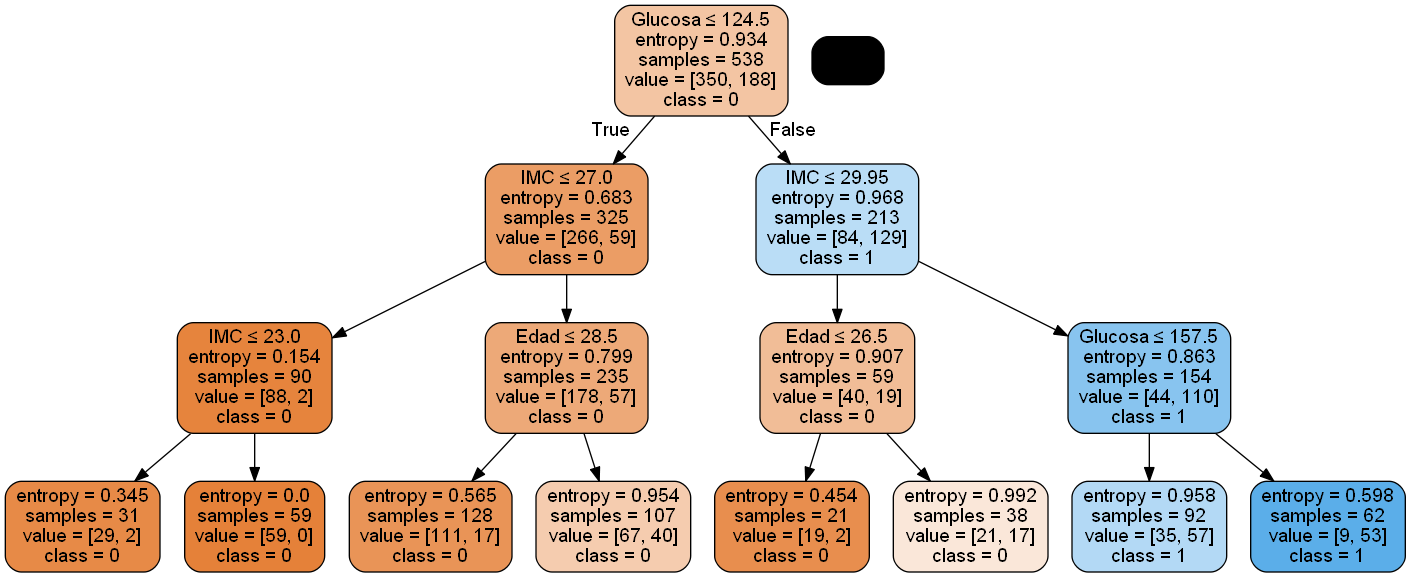

In [26]:
#Configuración para cargar nuestro árbol de precisión
arbol_data = StringIO()
export_graphviz(clf, out_file=arbol_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = caracteristicas_columnas,class_names=['0','1'])
grafico = pydotplus.graph_from_dot_data(arbol_data.getvalue())  
grafico.write_png('diabetes.png')
Image(grafico.create_png())